![header-Airbnbemoji](data/header-Airbnbemoji.jpg)


# Airbnb Listings
This dataset consists of five files with Airbnb rental listings of five cities: Austin, Bangkok, Buenos Aires, Cape Town and Istanbul. 

Each row represents a listing with details such as coordinates, neighborhood, host id, price per night, number of reviews, and so on. 

[Source: InsideAirbnb](http://insideairbnb.com)

## Data Dictionary

| Column                            | Explanation                                                                                                                                                                                        |
| --------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| id                                | Airbnb's unique identifier for the listing                                                                                                                                                         |
| name                              |                                                                                                                                                                                                    |
| host\_id                          |                                                                                                                                                                                                    |
| host\_name                        |                                                                                                                                                                                                    |
| neighbourhood\_group              | The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.                                                        |
| neighbourhood                     | The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.                                                              |
| latitude                          | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                                                                                                      |
| longitude                         | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                                                                                                      |
| room\_type                        |                                                                                                                                                                                                    |
| price                             | Daily price in local currency. Note, $ sign may be used despite locale                                                                                                                             |
| minimum\_nights                   | Minimum number of night stay for the listing (calendar rules may be different)                                                                                                                     |
| number\_of\_reviews               | The number of reviews the listing has                                                                                                                                                              |
| last\_review                      | The date of the last/newest review                                                                                                                                                                 |
| calculated\_host\_listings\_count | The number of listings the host has in the current scrape, in the city/region geography.                                                                                                           |
| availability\_365                 | avaliability\_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may be available because it has been booked by a guest or blocked by the host. |
| number\_of\_reviews\_ltm          | The number of reviews the listing has (in the last 12 months)        
| reviews\_per\_month               | The average number of reviews per month the listing has over the lifetime of the listing.
| license                           | The licence/permit/registration number                                                                                                                                                                                                 |

The data for each city was compiled by [InsideAirbnb](http://insideairbnb.com) between October and November 2021.

[Source](http://insideairbnb.com/get-the-data.html) and [license](https://creativecommons.org/licenses/by/4.0/) of dataset. 

In [5]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [6]:

austin = pd.read_csv("data/listings_austin.csv", index_col=0)
bangkok = pd.read_csv("data/listings_bangkok.csv", index_col=0)
buenos_aires = pd.read_csv("data/listings_buenos_aires.csv", index_col=0)
cape_town = pd.read_csv("data/listings_cape_town.csv", index_col=0)
istanbul = pd.read_csv("data/listings_istanbul.csv", index_col=0)

# Data preparation

In [7]:
austin.head(10)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27752,-97.71377,Entire home/apt,179,7,26,2021-07-02,0.36,3,35,2,NaN
5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27614,-97.71320,Private room,114,30,9,2017-02-24,0.21,3,0,0,NaN
5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,108,2,575,2021-09-25,24.16,1,324,39,NaN
5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,264,2021-07-03,5.95,1,0,7,NaN
6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,109,3,117,2021-04-02,1.27,1,0,4,NaN
6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,NaN,78704,30.26034,-97.76487,Entire home/apt,146,3,254,2021-10-04,2.06,1,201,22,NaN
8502,Woodland Studio Lodging,25298,Karen,NaN,78741,30.23466,-97.73682,Entire home/apt,44,3,46,2019-05-28,1.08,1,59,0,NaN
13035,Historic house in highly walkable East Austin,50793,Molly,NaN,78702,30.26098,-97.73072,Entire home/apt,150,30,12,2017-03-18,0.11,2,331,0,NaN
21126,Quiet Mid Century Modern Retreat with Patio an...,80406,Dani,NaN,78704,30.24417,-97.73988,Entire home/apt,232,1,126,2021-09-17,2.06,12,132,18,NaN


In [8]:
austin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11269 entries, 2265 to 52777085
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            11269 non-null  object 
 1   host_id                         11269 non-null  int64  
 2   host_name                       11218 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   11269 non-null  int64  
 5   latitude                        11269 non-null  float64
 6   longitude                       11269 non-null  float64
 7   room_type                       11269 non-null  object 
 8   price                           11269 non-null  int64  
 9   minimum_nights                  11269 non-null  int64  
 10  number_of_reviews               11269 non-null  int64  
 11  last_review                     8547 non-null   object 
 12  reviews_per_month              

Lets check if there are any missing values and process them.

In [9]:
print(f'Missing values in Austin: ({np.round(100*austin.isna().sum()/len(austin),1)}%)')
print(f'Missing values in Istanbul: ({np.round(100*austin.isna().sum()/len(istanbul),1)}%)')
print(f'Missing values in Bangkok: ({np.round(100*austin.isna().sum()/len(bangkok),1)}%)')
print(f'Missing values in Buenos_aires: ({np.round(100*austin.isna().sum()/len(buenos_aires),1)}%)')
print(f'Missing values in Cape Town: ({np.round(100*austin.isna().sum()/len(cape_town),1)}%)')

Missing values in Austin: (name                                0.0
host_id                             0.0
host_name                           0.5
neighbourhood_group               100.0
neighbourhood                       0.0
latitude                            0.0
longitude                           0.0
room_type                           0.0
price                               0.0
minimum_nights                      0.0
number_of_reviews                   0.0
last_review                        24.2
reviews_per_month                  24.2
calculated_host_listings_count      0.0
availability_365                    0.0
number_of_reviews_ltm               0.0
license                           100.0
dtype: float64%)
Missing values in Istanbul: (name                               0.0
host_id                            0.0
host_name                          0.2
neighbourhood_group               50.0
neighbourhood                      0.0
latitude                           0.0
longitude    

The same pattern is observed for all datasets:
- the low percentage missing value in column "host_name" - drop them
- missing values in the column "last_review" - convert to datetime and fillna with 0 value 
- missing values in the column "reviews_per_month" - fillna with 0 value
- column "neighbourhood_group" have more than 50% missing values and unique value - nan, so I drop it.
We can create a new column "neighbourhood_group on the base of "neighbourhood" if we need it. (let's look at the patterns we'll find in the data)
- columns "license" - I drop it

In [10]:
def clean_data(df):
    # Drop rows with missing 'host_name' values
    df =df.dropna(subset=['host_name'])
    # Drop column "neighbourhood_group" and "license"
    df = df.drop(['neighbourhood_group', "license"], axis=1)
    # Convert 'last_review' to datetime and fill missing values with '0'
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce').dt.year.fillna(0).astype(int)
    # Fill missing values in 'reviews_per_month' with 0
    df['reviews_per_month'] = df['reviews_per_month'].fillna(0)      
    # Identify room types and locations with no reviews, because I want to see if there's a correlation between lack of reviews and room type and location.
    no_reviews = df[df['number_of_reviews'] == 0][['room_type', 'neighbourhood']]
    
    return df , no_reviews 

austin_cleaned, austin_no_reviews = clean_data(austin)
austin_cleaned.head()   

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,,,,,,,,,,,,,,,
2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,78702,30.27752,-97.71377,Entire home/apt,179,7,26,2021,0.36,3,35,2
5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,78702,30.27614,-97.71320,Private room,114,30,9,2017,0.21,3,0,0
5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26057,-97.73441,Entire home/apt,108,2,575,2021,24.16,1,324,39
5769,NW Austin Room,8186,Elizabeth,78729,30.45697,-97.78422,Private room,39,1,264,2021,5.95,1,0,7
6413,Gem of a Studio near Downtown,13879,Todd,78704,30.24885,-97.73587,Entire home/apt,109,3,117,2021,1.27,1,0,4


In [11]:
bangkok_cleaned, bangkok_no_reviews = clean_data(bangkok)
buenos_aires_cleaned, buenos_aires_no_reviews = clean_data(buenos_aires)
cape_town_cleaned, cape_town_no_reviews = clean_data(cape_town)
istanbul_cleaned, istanbul_no_reviews = clean_data(istanbul)

# Data Vizualization

I combine all no_reviews DataFrames into one to see distribution of room types with no reviews for each city.

In [12]:
combined_no_reviews = pd.concat([
    austin_no_reviews.assign(city='Austin'),
    istanbul_no_reviews.assign(city='Istanbul'),
    bangkok_no_reviews.assign(city='Bangkok'),
    buenos_aires_no_reviews.assign(city='Buenos Aires'),
    cape_town_no_reviews.assign(city='Cape town')
])
combined_no_reviews['city'] = combined_no_reviews['city'].astype('category')
combined_no_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30597 entries, 77347 to 53001080
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   room_type      30597 non-null  object  
 1   neighbourhood  30597 non-null  object  
 2   city           30597 non-null  category
dtypes: category(1), object(2)
memory usage: 747.2+ KB


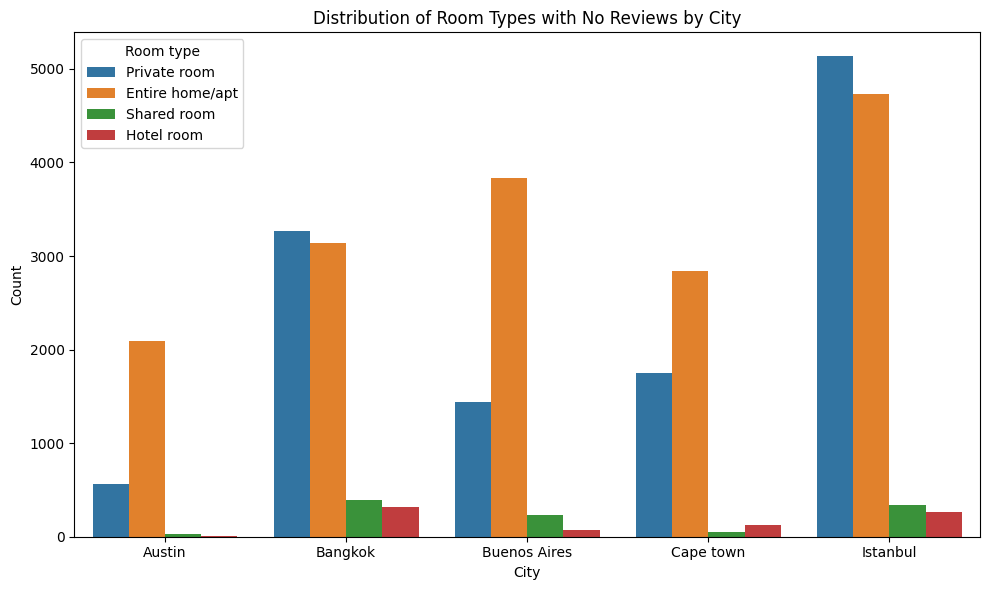

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_no_reviews, x='city', hue='room_type')
plt.title('Distribution of Room Types with No Reviews by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Room type')
plt.tight_layout()
plt.show()

The distribution of room types with no reviews is relatively similar across the cities, with 'Entire home/apt' and 'Private room' being the dominant categories.

The percentage of 'Entire home/apt'  and 'Private room' listings with no reviews is highest in **Istanbul**.

The 'Hotel room' type is almost negligible in all cities except for Bangkok, where it has a slightly higher percentage.

I suggest considering additional promo codes or bonuses if a person leaves a review after staying at a place. This would help address comments, address preferences and ultimately increase the appeal of the place, which would be reflected in increased profits. 

In [14]:
# I will concatenate all the tables into one table for easy data manipulation.
combined_cities = pd.concat([
    austin_cleaned.assign(city='Austin'),
    istanbul_cleaned.assign(city='Istanbul'),
    bangkok_cleaned.assign(city='Bangkok'),
    buenos_aires_cleaned.assign(city='Buenos Aires'),
    cape_town_cleaned.assign(city='Cape town')
])

combined_cities.head(20)


,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
id,,,,,,,,,,,,,,,,
2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,78702,30.27752,-97.71377,Entire home/apt,179,7,26,2021,0.36,3,35,2,Austin
5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,78702,30.27614,-97.71320,Private room,114,30,9,2017,0.21,3,0,0,Austin
5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26057,-97.73441,Entire home/apt,108,2,575,2021,24.16,1,324,39,Austin
5769,NW Austin Room,8186,Elizabeth,78729,30.45697,-97.78422,Private room,39,1,264,2021,5.95,1,0,7,Austin
6413,Gem of a Studio near Downtown,13879,Todd,78704,30.24885,-97.73587,Entire home/apt,109,3,117,2021,1.27,1,0,4,Austin
6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,78704,30.26034,-97.76487,Entire home/apt,146,3,254,2021,2.06,1,201,22,Austin
8502,Woodland Studio Lodging,25298,Karen,78741,30.23466,-97.73682,Entire home/apt,44,3,46,2019,1.08,1,59,0,Austin
13035,Historic house in highly walkable East Austin,50793,Molly,78702,30.26098,-97.73072,Entire home/apt,150,30,12,2017,0.11,2,331,0,Austin
21126,Quiet Mid Century Modern Retreat with Patio an...,80406,Dani,78704,30.24417,-97.73988,Entire home/apt,232,1,126,2021,2.06,12,132,18,Austin


Since the daily price is in local currency, we will convert it to the single currency US dollar. 

In [15]:
def convert_to_usd(price,city):
    conversation_rates = {'Austin': 1.0,
                      'Istanbul': 0.029,
                      'Bangkok': 0.027,
                      'Buenos Aires': 0.001,
                      'Cape town': 0.056}
    
    return price * conversation_rates[city]

combined_cities['price_usd'] = combined_cities.apply(lambda row: convert_to_usd(row['price'], row['city']), axis=1)
combined_cities.head(20)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city,price_usd
id,,,,,,,,,,,,,,,,,
2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,78702,30.27752,-97.71377,Entire home/apt,179,7,26,2021,0.36,3,35,2,Austin,179.0
5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,78702,30.27614,-97.71320,Private room,114,30,9,2017,0.21,3,0,0,Austin,114.0
5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26057,-97.73441,Entire home/apt,108,2,575,2021,24.16,1,324,39,Austin,108.0
5769,NW Austin Room,8186,Elizabeth,78729,30.45697,-97.78422,Private room,39,1,264,2021,5.95,1,0,7,Austin,39.0
6413,Gem of a Studio near Downtown,13879,Todd,78704,30.24885,-97.73587,Entire home/apt,109,3,117,2021,1.27,1,0,4,Austin,109.0
6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,78704,30.26034,-97.76487,Entire home/apt,146,3,254,2021,2.06,1,201,22,Austin,146.0
8502,Woodland Studio Lodging,25298,Karen,78741,30.23466,-97.73682,Entire home/apt,44,3,46,2019,1.08,1,59,0,Austin,44.0
13035,Historic house in highly walkable East Austin,50793,Molly,78702,30.26098,-97.73072,Entire home/apt,150,30,12,2017,0.11,2,331,0,Austin,150.0
21126,Quiet Mid Century Modern Retreat with Patio an...,80406,Dani,78704,30.24417,-97.73988,Entire home/apt,232,1,126,2021,2.06,12,132,18,Austin,232.0


In [16]:
combined_cities.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_usd
count,8.573300e+04,85733.000000,85733.000000,85733.000000,85733.000000,85733.000000,85733.000000,85733.000000,85733.000000,85733.000000,85733.000000,85733.000000
mean,1.404067e+08,3.726172,6.871299,2370.077461,7.687810,16.751648,1298.865408,0.718299,9.235125,233.384041,3.059837,82.764781
std,1.276616e+08,32.569534,65.192024,15551.256072,29.673677,40.768034,967.584307,2.862363,24.845192,131.939464,9.030297,280.454867
min,2.300000e+01,-34.689620,-98.056630,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.602986e+07,-34.043700,-58.407379,400.000000,1.000000,0.000000,0.000000,0.000000,1.000000,95.000000,0.000000,7.751000
50%,1.002364e+08,13.736460,18.525490,900.000000,2.000000,2.000000,2019.000000,0.100000,2.000000,283.000000,0.000000,23.635000
75%,2.412294e+08,40.959140,29.030790,2100.000000,4.000000,14.000000,2020.000000,0.710000,7.000000,363.000000,2.000000,67.500000
max,4.293917e+08,41.483730,100.923440,997739.000000,1100.000000,1116.000000,2021.000000,305.000000,293.000000,365.000000,351.000000,12980.000000


room_type     Entire home/apt  Hotel room  Private room  Shared room
city                                                                
Austin             329.612660  602.545455    134.207317    65.983471
Bangkok             59.678086   55.986674     56.792379    36.077789
Buenos Aires         6.131868   41.570197      3.551374     5.617943
Cape town          152.599006  174.034604     65.534459    29.377833
Istanbul            26.494764   29.276914     14.640383    13.499532


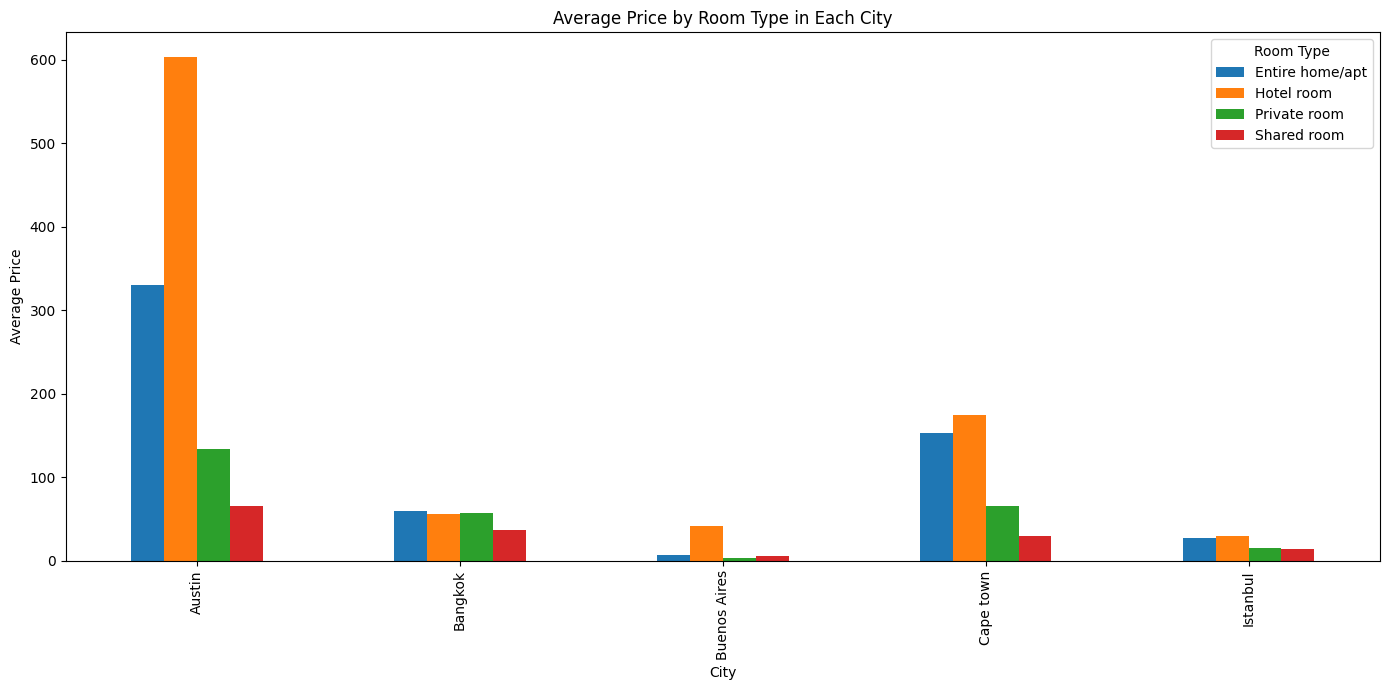

In [17]:
#  Average price by room type in each neighborhood
average_room_type = combined_cities.groupby(['city', 'room_type'])['price_usd'].mean().unstack()
print(average_room_type)

# Bar plot of average price by room type in neighborhoods
average_room_type.plot(kind='bar', figsize=(14, 7))
plt.title("Average Price by Room Type in Each City")
plt.xlabel("City")
plt.ylabel("Average Price")
plt.legend(title="Room Type")
plt.tight_layout()
plt.show()

- Across all cities, "Entire home/apt" consistently has the highest price.
- "Private room" and "Shared room" are more affordable options in all cities.
- **Austin** has the highest prices across all room types compared to other cities.
- **Bangkok** and **Cape Town** have similar pricing trends, with "Entire home/apt" being the most expensive, followed by "Private room" and "Shared room".
- **Istanbul** and **Buenos Aires** also follow the same trend but have generally lower prices compared to Austin.
- The availability of "Hotel room" data is limited.

room_type     Entire home/apt  Hotel room  Private room  Shared room
city                                                                
Austin              12980.000    3004.000     10000.000      700.000
Bangkok              8100.000     945.000      8939.808     2700.000
Buenos Aires          994.755     997.739       652.764      994.755
Cape town            9828.000    2520.000      7197.176      179.200
Istanbul             2519.346    2116.971      3229.527     1740.000


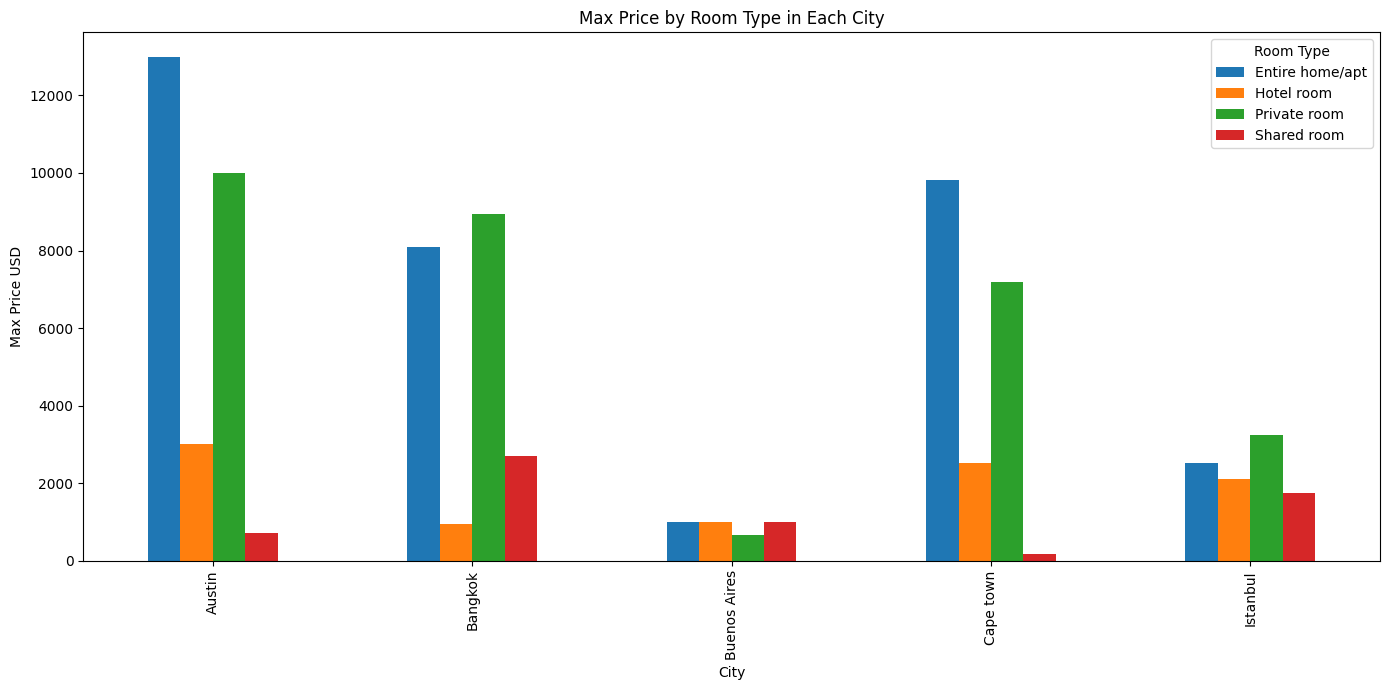

In [18]:
#  Max price by room type in each city
max_price_room_type = combined_cities.groupby(['city', 'room_type'])['price_usd'].max().unstack()
print(max_price_room_type)

# Bar plot of average price by room type in cities
max_price_room_type.plot(kind='bar', figsize=(14, 7))
plt.title("Max Price by Room Type in Each City")
plt.xlabel("City")
plt.ylabel("Max Price USD")
plt.legend(title="Room Type")
plt.tight_layout()
plt.show()

- Austin consistently shows the highest prices, both average and maximum, across all room types compared to other cities. The difference in prices between Austin and other cities is significant, making Austin the most expensive city among the ones analyzed.
- Istanbul, Bangkok, Buenos Aires, and Cape Town follow similar pricing trends but generally have lower prices compared to Austin. 
Adittionaly, Istanbul and Buenos Aires are the most affordable cities in terms of both average and maximum prices.

In [19]:
# Using the data for all cities, let's check how many professional hosts account for all listings.
# Assume a professional host has 2 and more listings
professional_host_threshold = 1
combined_cities['is_professional_host'] = combined_cities['calculated_host_listings_count'] > professional_host_threshold
professional_hosts_by_city = combined_cities.groupby(['city', 'is_professional_host'])
non_professional_hosts = combined_cities.groupby([~combined_cities['is_professional_host']])
professional_hosts_by_city.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city,price_usd,is_professional_host
id,,,,,,,,,,,,,,,,,,
2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,78702,30.27752,-97.71377,Entire home/apt,179,7,26,2021,0.36,3,35,2,Austin,179.000,True
5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,78702,30.27614,-97.71320,Private room,114,30,9,2017,0.21,3,0,0,Austin,114.000,True
5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26057,-97.73441,Entire home/apt,108,2,575,2021,24.16,1,324,39,Austin,108.000,False
5769,NW Austin Room,8186,Elizabeth,78729,30.45697,-97.78422,Private room,39,1,264,2021,5.95,1,0,7,Austin,39.000,False
6413,Gem of a Studio near Downtown,13879,Todd,78704,30.24885,-97.73587,Entire home/apt,109,3,117,2021,1.27,1,0,4,Austin,109.000,False
6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,78704,30.26034,-97.76487,Entire home/apt,146,3,254,2021,2.06,1,201,22,Austin,146.000,False
8502,Woodland Studio Lodging,25298,Karen,78741,30.23466,-97.73682,Entire home/apt,44,3,46,2019,1.08,1,59,0,Austin,44.000,False
13035,Historic house in highly walkable East Austin,50793,Molly,78702,30.26098,-97.73072,Entire home/apt,150,30,12,2017,0.11,2,331,0,Austin,150.000,True
21126,Quiet Mid Century Modern Retreat with Patio an...,80406,Dani,78704,30.24417,-97.73988,Entire home/apt,232,1,126,2021,2.06,12,132,18,Austin,232.000,True


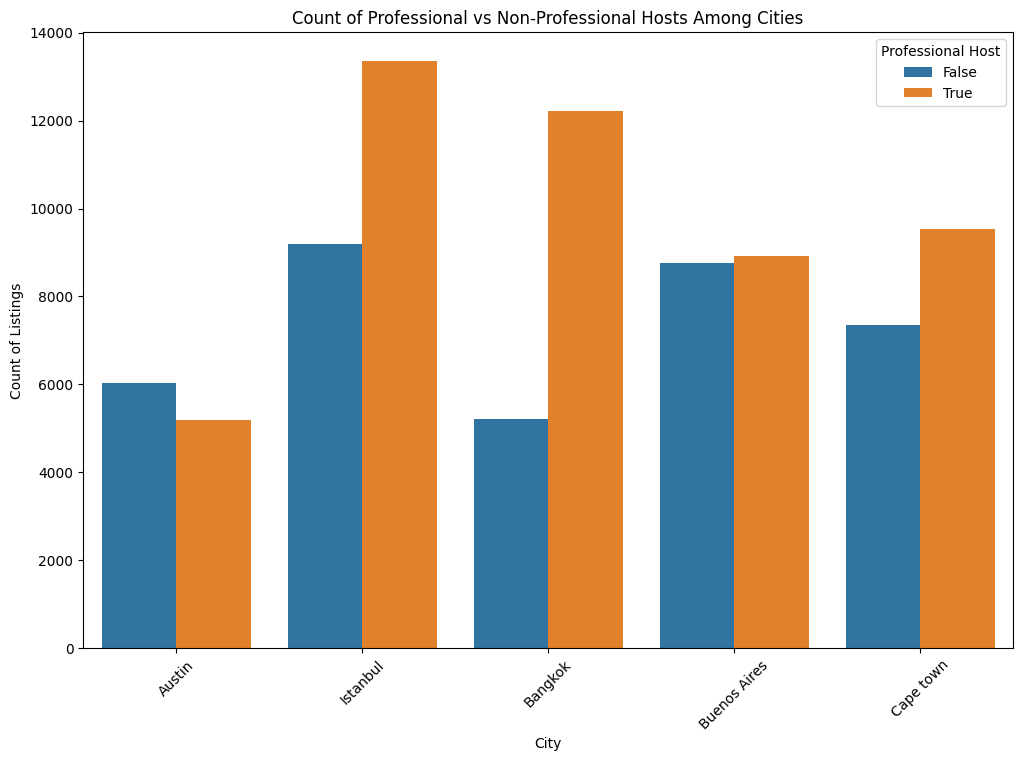

In [20]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=combined_cities, x='city', hue='is_professional_host')
ax.set_title('Count of Professional vs Non-Professional Hosts Among Cities')
ax.set_xlabel('City')
ax.set_ylabel('Count of Listings')
plt.xticks(rotation=45)
plt.legend(title='Professional Host')
plt.show()

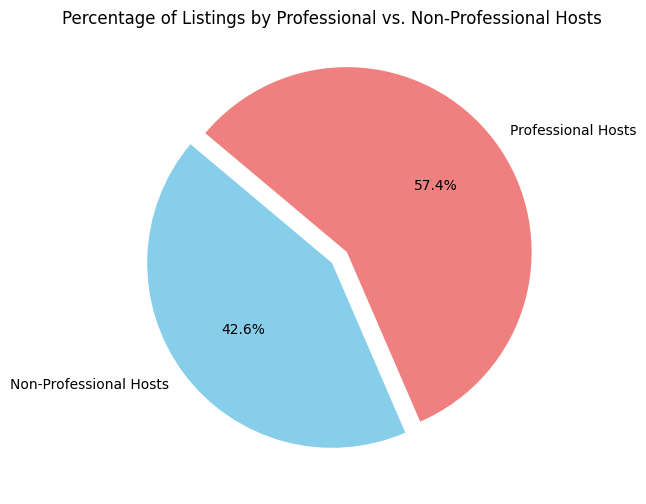

In [21]:
total_listings = len(combined_cities)
professional_listings = combined_cities['is_professional_host'].sum()
professional_percentage = (professional_listings / total_listings) * 100

# Pie chart for percentage of professional vs. non-professional hosts
labels = ['Non-Professional Hosts', 'Professional Hosts']
sizes = [100 - professional_percentage, professional_percentage]
colors = ['skyblue', 'lightcoral']
explode = (0, 0.1)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Listings by Professional vs. Non-Professional Hosts')
plt.show()


Professional hosts are more prevalent in most cities, but the proportion of non-professional hosts is still significant.

In [22]:
# Aggregate by professional status
trends_by_professional = combined_cities.groupby('is_professional_host').agg({
    'price_usd': ['mean', 'median'],
    'reviews_per_month': ['mean', 'median'],
    'availability_365': ['mean', 'median'],
    'calculated_host_listings_count': ['mean', 'median']
}).reset_index().unstack()

print(trends_by_professional)



is_professional_host                    0         False
                                        1          True
price_usd                       mean    0     85.396041
                                        1     80.811615
                                median  0        22.568
                                        1        24.215
reviews_per_month               mean    0      0.605526
                                        1      0.802009
                                median  0          0.05
                                        1          0.15
availability_365                mean    0    207.968789
                                        1    252.249599
                                median  0         180.0
                                        1         315.0
calculated_host_listings_count  mean    0           1.0
                                        1     15.347999
                                median  0           1.0
                                        1       

Summary:
About **57.4%** of listings are operated by inferred **professional hosts**.

Professional hosts appear to operate at slightly lower average prices but maintain a higher median, suggesting tighter price control and potentially fewer outliers (e.g., fewer luxury or unusually priced listings).
The difference between mean and median prices for non-professional hosts is larger, hinting at more variability in pricing.

Professional and non-professional hosts have **similar review activity**, with medians of 0.8 and 0.6, respectively.

Listings by professional hosts are available significantly more days (median of 315 days) than those by non-professionals (median of 180 days).

**Professional hosts** manage an average of **~15.35 listings**, compared to 1 listing for non-professionals.

In [23]:
# Filter listings based on minimum_nights
def categorize_minimum_nights(minimum_nights):
    if minimum_nights < 10:
        return "short"
    elif  10 <= minimum_nights <= 20:
        return "middle"
    else:
        return "long"
    
combined_cities['stay_category'] = combined_cities['minimum_nights'].apply(categorize_minimum_nights)

stay_category_percentage = combined_cities.groupby(['city', 'stay_category']).size().reset_index(name='count')
total_listings_per_city = combined_cities['city'].value_counts().reset_index()
total_listings_per_city.columns = ['city', 'total_count']
stay_category_percentage = stay_category_percentage.merge(total_listings_per_city, on='city')
stay_category_percentage['percentage'] = (stay_category_percentage['count'] / stay_category_percentage['total_count']) * 100
stay_category_percentage.head(20)

,city,stay_category,count,total_count,percentage
0,Austin,long,1639,11218,14.610447
1,Austin,middle,132,11218,1.176680
2,Austin,short,9447,11218,84.212872
3,Bangkok,long,2846,17427,16.330981
4,Bangkok,middle,722,17427,4.142996
5,Bangkok,short,13859,17427,79.526023
6,Buenos Aires,long,1233,17667,6.979114
7,Buenos Aires,middle,946,17667,5.354616
8,Buenos Aires,short,15488,17667,87.666270
9,Cape town,long,334,16882,1.978439


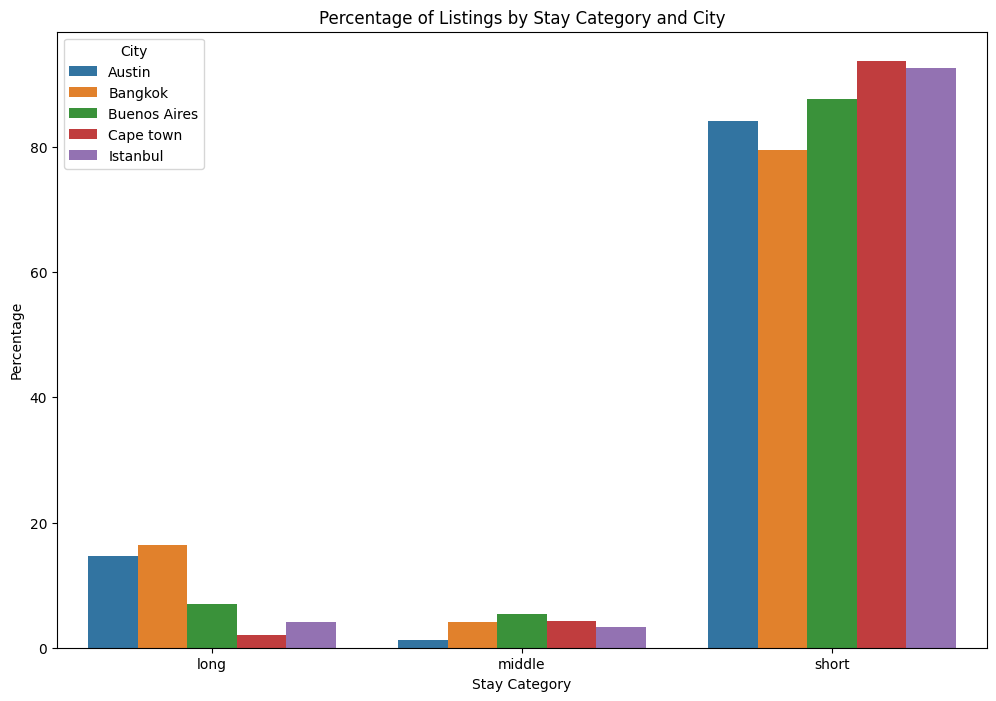

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(data=stay_category_percentage, x='stay_category', y='percentage', hue='city')
plt.title('Percentage of Listings by Stay Category and City')
plt.xlabel('Stay Category')
plt.ylabel('Percentage')
plt.legend(title='City')
plt.show()

We see that most people choose short-term rentals among all cities, as there is a significant percentage of 16% and 14% long-term rentals in Bangkok and Austin. 

Let's see who prevails in rentals professional host or non-professional host.

In [25]:
stay_category_professional = combined_cities.groupby(['city', 'stay_category', 'is_professional_host']).size().reset_index(name='count')
total_listings_per_city = combined_cities['city'].value_counts().reset_index()
total_listings_per_city.columns = ['city', 'total_count']
stay_category_professional = stay_category_professional.merge(total_listings_per_city, on='city')
stay_category_professional['percentage'] = (stay_category_professional['count'] / stay_category_professional['total_count']) * 100
stay_category_professional.head(20)

,city,stay_category,is_professional_host,count,total_count,percentage
0,Austin,long,False,563,11218,5.018720
1,Austin,long,True,1076,11218,9.591728
2,Austin,middle,False,71,11218,0.632911
3,Austin,middle,True,61,11218,0.543769
4,Austin,short,False,5389,11218,48.038866
5,Austin,short,True,4058,11218,36.174006
6,Bangkok,long,False,1097,17427,6.294830
7,Bangkok,long,True,1749,17427,10.036151
8,Bangkok,middle,False,225,17427,1.291100
9,Bangkok,middle,True,497,17427,2.851896


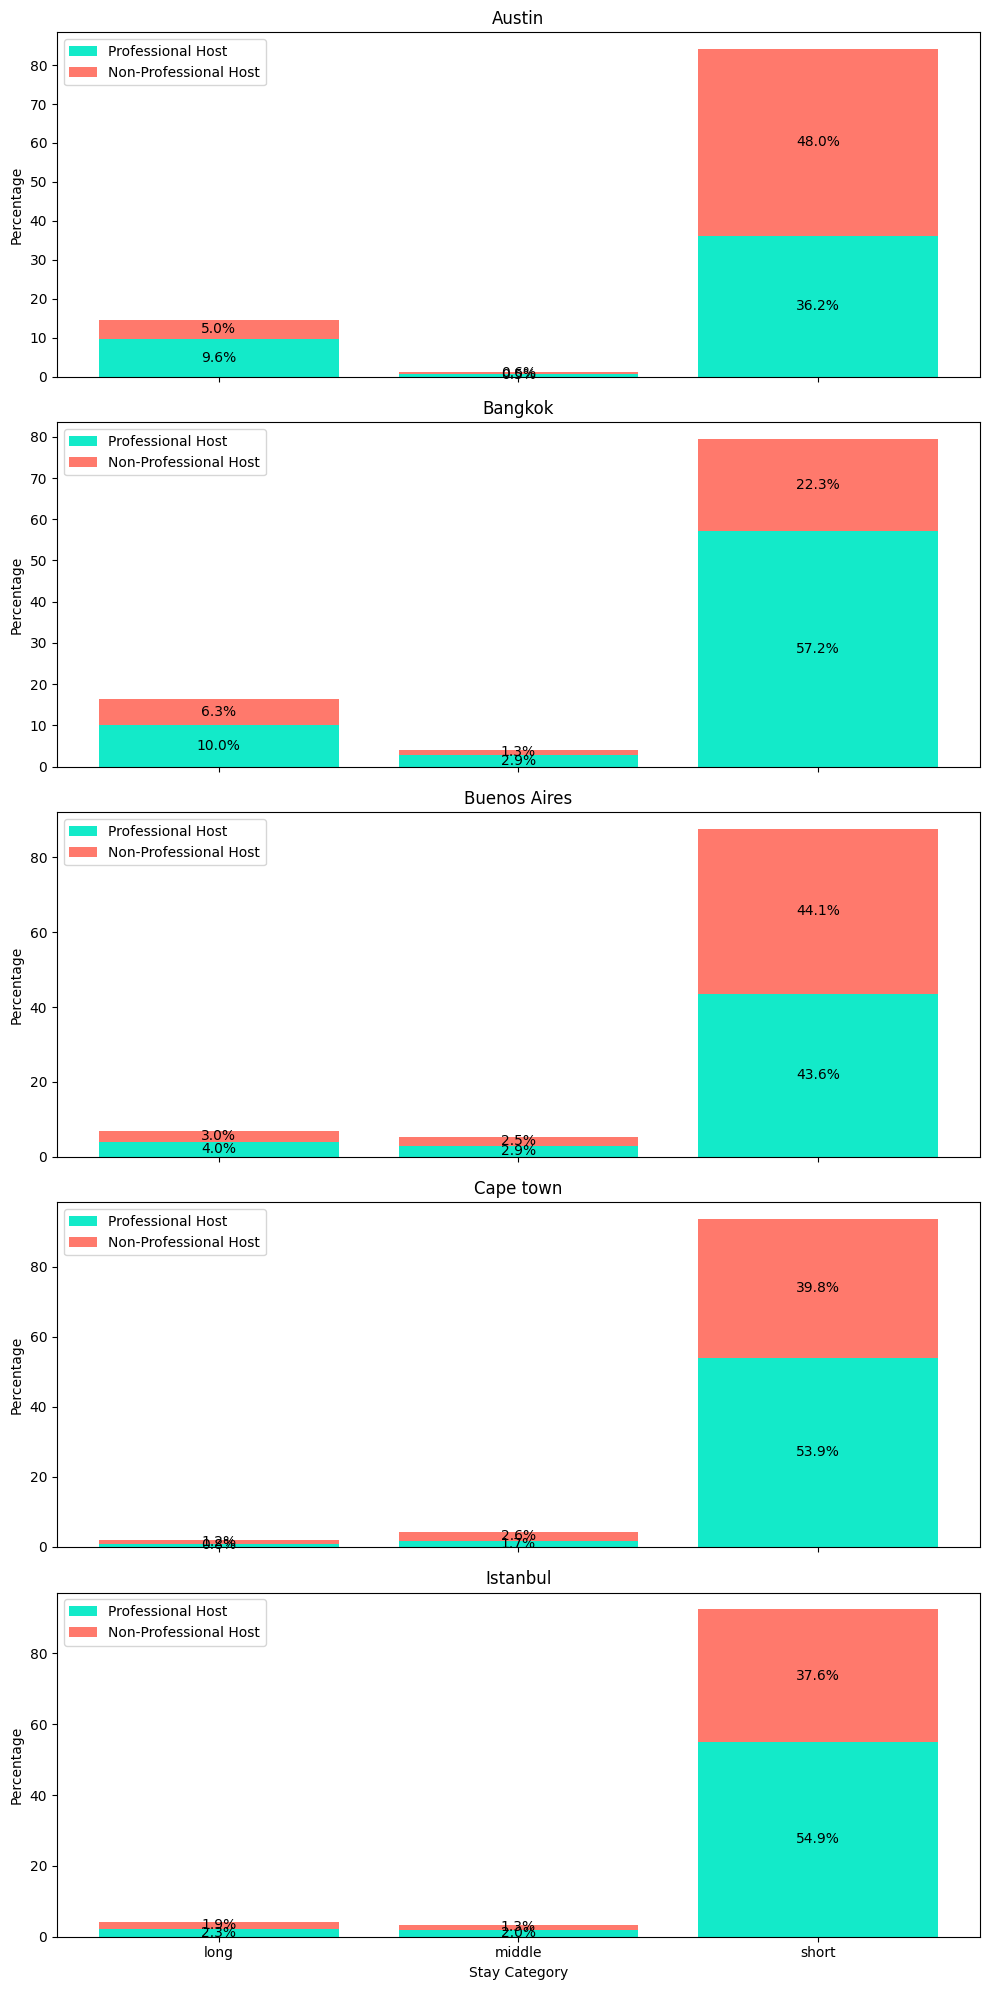

In [26]:
# Stacked bar chart for each city to compare the distribution of rentals based on stay category and professional or non-professional hosts
cities = stay_category_professional['city'].unique()
stay_categories = stay_category_professional['stay_category'].unique()

fig, axes = plt.subplots(len(cities), 1, figsize=(10, 20), sharex=True)

for i, city in enumerate(cities):
    city_data = stay_category_professional[stay_category_professional['city'] == city]
    professional_data = city_data[city_data['is_professional_host'] == True].pivot(index='stay_category', columns='is_professional_host', values='percentage').fillna(0)
    non_professional_data = city_data[city_data['is_professional_host'] == False].pivot(index='stay_category', columns='is_professional_host', values='percentage').fillna(0)
    
    bars1 = axes[i].bar(professional_data.index, professional_data[True], label='Professional Host', color='#13eac9')
    bars2 = axes[i].bar(non_professional_data.index, non_professional_data[False], bottom=professional_data[True], label='Non-Professional Host', color='#ff796c')
    
    axes[i].set_title(f'{city}')
    axes[i].set_ylabel('Percentage')
    axes[i].legend()
    
    # percentage labels
    for bar in bars1:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.1f}%', ha='center', va='center', color='black')
    
    for bar in bars2:
        height = bar.get_height()
        bottom = bar.get_y()
        axes[i].text(bar.get_x() + bar.get_width() / 2, bottom + height / 2, f'{height:.1f}%', ha='center', va='center', color='black')

plt.xlabel('Stay Category')
plt.tight_layout() 
plt.show()

- **Professional hosts dominate** in cities like Bangkok, Cape Town, and Istanbul, with a **focus on short-term** rentals.

- **Non-professional** hosts are more prominent in **Austin**, though their dominance is less pronounced.


- Bangkok: Professional hosts significantly outpace non-professional hosts in both short and long-term stays.
- Cape Town: While professional hosts dominate short-term stays, they contribute minimally to long-term rentals.
- Istanbul: Shows a balanced but professional-host-dominated rental landscape.

Based on findings, we can propose:
1. Bangkok and Istanbul: Focus on professional hosts for short and long-term rental markets.
2. Austin: Target non-professional hosts for partnerships, as they dominate the market.
3. Cape Town: Investigate why professional hosts avoid long-term stays and whether incentives could increase their engagement.


keep digging) 

room_type                          Entire home/apt  Hotel room  Private room  \
city         is_professional_host                                              
Austin       False                      309.924462  202.250000    143.060473   
             True                       352.241912  831.285714    123.094609   
Bangkok      False                       72.600707   61.774615     61.376537   
             True                        54.014948   55.737249     54.423213   
Buenos Aires False                        6.414676    5.551929      2.746732   
             True                         5.855462   44.741616      4.407386   
Cape town    False                      134.598459  114.772000     49.910111   
             True                       169.209412  176.453486     72.951602   
Istanbul     False                       25.816124   82.704298     11.220434   
             True                        26.849759   24.776758     18.216946   

room_type                          Shar

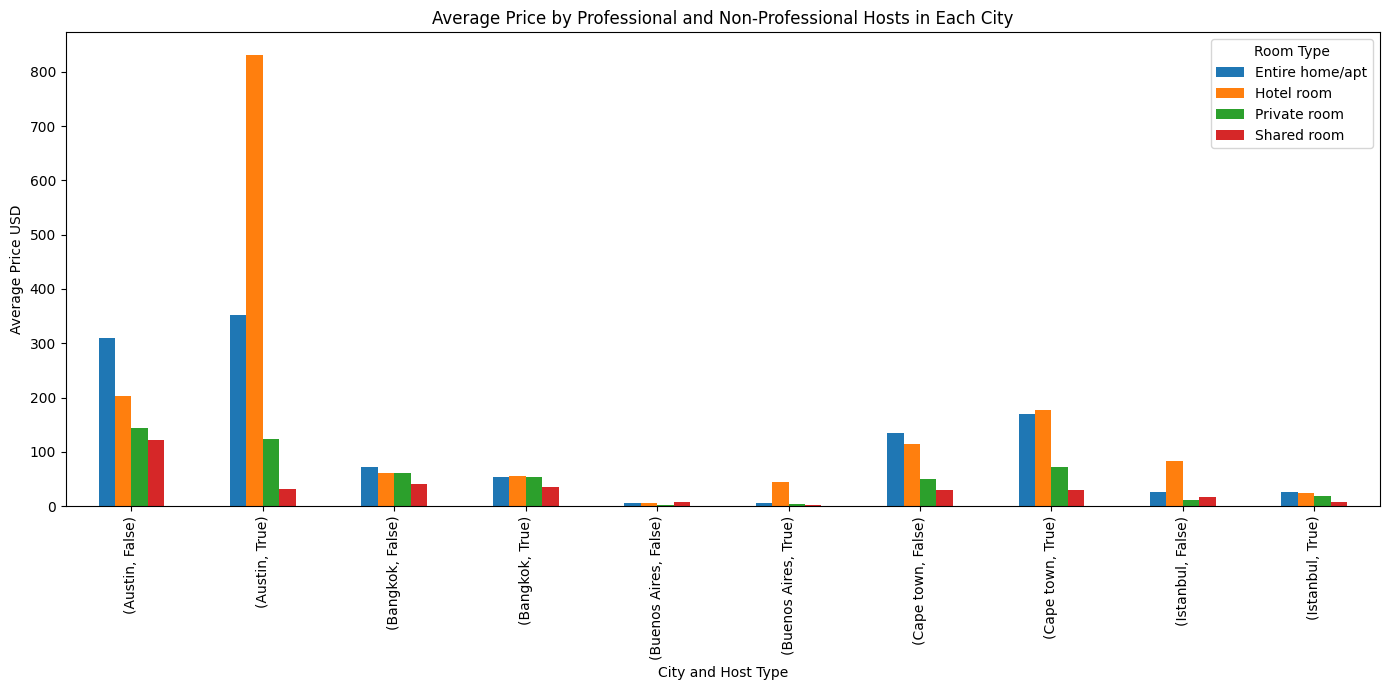

In [27]:
# Average price by host type and room type in each city
average_price_host_type = combined_cities.groupby(['city', 'is_professional_host', 'room_type'])['price_usd'].mean().unstack()
print(average_price_host_type)

# Bar plot for visual comparison
average_price_host_type.plot(kind='bar', figsize=(14, 7))
plt.title("Average Price by Professional and Non-Professional Hosts in Each City")
plt.xlabel("City and Host Type")
plt.ylabel("Average Price USD")
plt.legend(title="Room Type")
plt.tight_layout()
plt.show()

In [29]:
from scipy.stats import f_oneway


professional_prices = combined_cities[combined_cities['is_professional_host']]['price_usd']
non_professional_prices = combined_cities[~combined_cities['is_professional_host']]['price_usd']

# Perform ANOVA
anova_result = f_oneway(professional_prices, non_professional_prices)
print("ANOVA F-Statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("Significant difference between professional and non-professional hosts' prices.")
else:
    print("No significant difference between professional and non-professional hosts' prices.")

ANOVA F-Statistic: 5.602064791781784
ANOVA p-value: 0.017941531661156685
Significant difference between professional and non-professional hosts' prices.


- **Austin, Cape Town:  Professional hosts charge more for "Entire home/apt" and "Hotel room" listings**, but the differences for other room types are negligible.
- Austin: The premium charged by professional hosts for "Entire home/apt" and "Hotel room" indicates a more competitive market for high-end accommodations, possibly catering to tourists or business travelers.
- **Bangkok and Buenos Aires**: Professional hosts may focus on maintaining lower prices to attract guests in markets with overall lower price points.
- **Cape Town and Istanbul**: Professional hosts show moderate price premiums, suggesting differentiation in service quality or property features.

Professional hosts generally charge higher prices for "Entire home/apt" and "Hotel room" listings, with significant variations across cities.

In [31]:
#  Stay_category and room_type convert into numerical columns 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combined_cities['stay_category']= le.fit_transform(combined_cities['stay_category']) 
combined_cities['room_type']= le.fit_transform(combined_cities['room_type']) 

In [32]:
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'Entire home/apt': np.int64(0), 'Hotel room': np.int64(1), 'Private room': np.int64(2), 'Shared room': np.int64(3)}


In [33]:
professional_host_stay = combined_cities[combined_cities['is_professional_host']]['stay_category']
non_professional_host_stay = combined_cities[~combined_cities['is_professional_host']]['stay_category']

# Perform ANOVA
anova_result = f_oneway(professional_host_stay, non_professional_host_stay)
print("ANOVA F-Statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("Significant difference between professional and non-professional hosts' stay_category.")
else:
    print("No significant difference between professional and non-professional hosts' stay_category.")

ANOVA F-Statistic: 11.099697984585333
ANOVA p-value: 0.0008637825113195226
Significant difference between professional and non-professional hosts' stay_category.


Professional hosts are more likely to have listings that target specific categories of accommodation (e.g. long-term or short-term stays). This may be because professional hosts optimize their offerings according to local demand or market strategies.
Non-professional hosts may offer more flexible listings that do not target specific stay categories.
We have already found a trend that a higher percentage of professional hosts are in extended stay categories in cities such as Bangkok and Cape Town. This is consistent with ANOVA results that statistically confirm these trends.

#  PCA

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

First, let's see how our features correlate with each other.

In [35]:
combined_cities["is_professional_host"] = [int(row) for row in combined_cities["is_professional_host"]]
combined_cities.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city,price_usd,is_professional_host,stay_category
id,,,,,,,,,,,,,,,,,,,
2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,78702,30.27752,-97.71377,0,179,7,26,2021,0.36,3,35,2,Austin,179.0,1,2
5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,78702,30.27614,-97.71320,2,114,30,9,2017,0.21,3,0,0,Austin,114.0,1,0
5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26057,-97.73441,0,108,2,575,2021,24.16,1,324,39,Austin,108.0,0,2
5769,NW Austin Room,8186,Elizabeth,78729,30.45697,-97.78422,2,39,1,264,2021,5.95,1,0,7,Austin,39.0,0,2
6413,Gem of a Studio near Downtown,13879,Todd,78704,30.24885,-97.73587,0,109,3,117,2021,1.27,1,0,4,Austin,109.0,0,2


In [36]:
combined_cities = combined_cities.drop(['host_id', "reviews_per_month", "number_of_reviews_ltm", "price"], axis=1)

In [37]:
numerical_features = list(combined_cities.columns[(combined_cities.dtypes == "float64") | (combined_cities.dtypes == "int64")])
categorical_features = list(combined_cities.columns[(combined_cities.dtypes == object)])

In [38]:
combined_cities[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 85733 entries, 2265 to 53001080
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        85733 non-null  float64
 1   longitude                       85733 non-null  float64
 2   room_type                       85733 non-null  int64  
 3   minimum_nights                  85733 non-null  int64  
 4   number_of_reviews               85733 non-null  int64  
 5   last_review                     85733 non-null  int64  
 6   calculated_host_listings_count  85733 non-null  int64  
 7   availability_365                85733 non-null  int64  
 8   price_usd                       85733 non-null  float64
 9   is_professional_host            85733 non-null  int64  
 10  stay_category                   85733 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 7.8 MB


In [39]:
combined_cities[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 85733 entries, 2265 to 53001080
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           85694 non-null  object
 1   host_name      85733 non-null  object
 2   neighbourhood  85733 non-null  object
 3   city           85733 non-null  object
dtypes: object(4)
memory usage: 3.3+ MB


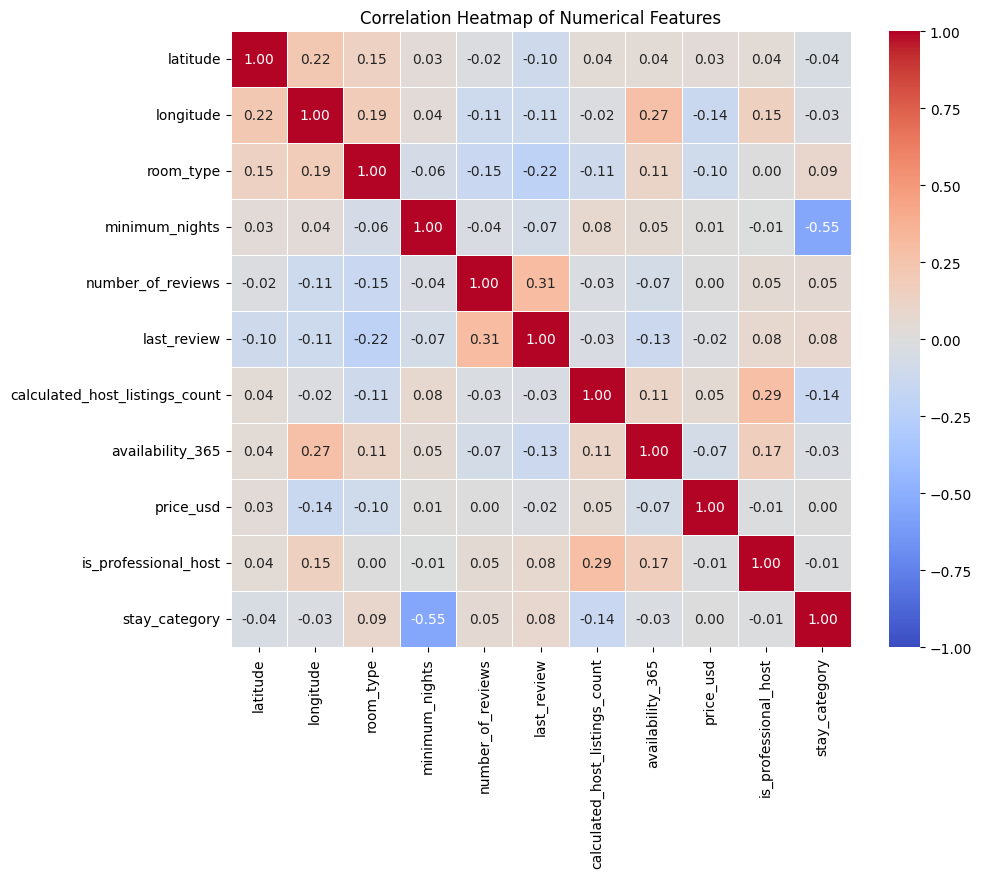

In [40]:
corr = combined_cities[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

According to this heat map we observe **strong correlation**:

- availability_365 and longitude have a moderate correlation (~0.27), which might reflect regional trends or availability policies.
- minimum_nights and stay_category show negative correlation (-0.55). This suggests that longer stays are associated with a distinct stay category (likely "long rent").
- Is_professional_host have weak positive correlation with calculated_host_listings_count (~0.29). This aligns with expectations since professional hosts usually manage more listings.

price_usd shows  **weak correlations** with most features. This suggests that price is influenced by factors outside the included features, such as location attractiveness, seasonality, or host quality.



In [41]:
#Standardization
st = StandardScaler()
st.fit(combined_cities[numerical_features])
data_sc = st.transform(combined_cities[numerical_features])
data_sc

array([[ 0.81522514, -1.60427108, -0.67669805, ...,  0.34314177,
         0.86156414,  0.35348748],
       [ 0.81518277, -1.60426234,  1.41957315, ...,  0.11137408,
         0.86156414, -3.16203276],
       [ 0.81470471, -1.60458769, -0.67669805, ...,  0.08998013,
        -1.16067969,  0.35348748],
       ...,
       [-1.15948643,  0.1762835 , -0.67669805, ...,  0.50359634,
         0.86156414, -1.40427264],
       [-1.15572557,  0.17707589, -0.67669805, ...,  0.10424276,
         0.86156414,  0.35348748],
       [-1.15692425,  0.17647461, -0.67669805, ..., -0.10541786,
         0.86156414,  0.35348748]])

In [42]:
pca = PCA()
combined_cities_after_pca = pca.fit_transform(data_sc)
pca.components_

array([[ 0.28390322,  0.43585124,  0.29627949,  0.28485124, -0.31987361,
        -0.39016596,  0.17218506,  0.38186438, -0.11247451,  0.17876275,
        -0.29306577],
       [ 0.10768263,  0.21725843,  0.40255124, -0.54759823, -0.12357481,
        -0.13057391, -0.2903331 ,  0.09436261, -0.14451876, -0.07684101,
         0.57182497],
       [ 0.04709633,  0.18676912, -0.13548216, -0.21580963,  0.32123678,
         0.34219147,  0.41056096,  0.28546168, -0.05875974,  0.62393419,
         0.18677979],
       [-0.03956928, -0.29060053, -0.06394536, -0.22850856, -0.38207854,
        -0.35426779,  0.43018634, -0.04754926,  0.59287949,  0.13042874,
         0.17421767],
       [ 0.76429292,  0.12217495,  0.08207126,  0.03822053,  0.30559943,
         0.09944261, -0.10099601, -0.25864782,  0.45852602, -0.04084612,
        -0.02097292],
       [-0.24495991,  0.21831746, -0.20188695,  0.07430989,  0.11591987,
         0.05043312, -0.37342646,  0.61057989,  0.54280528, -0.14686087,
         0.040

In [43]:
pca.explained_variance_ratio_

array([0.16665777, 0.14662669, 0.12543337, 0.10221437, 0.0938317 ,
       0.07721808, 0.0700568 , 0.06724898, 0.05771077, 0.05304519,
       0.03995628])

In [44]:
pca = PCA(n_components=2)
combined_cities_after_pca = pca.fit_transform(data_sc)

In [45]:
pca.explained_variance_ratio_

array([0.16665777, 0.14662669])

In [46]:
df = pd.DataFrame(pca.components_, columns=combined_cities[numerical_features].columns)
df.T.head(15)

,0,1
latitude,0.283903,0.107683
longitude,0.435851,0.217258
room_type,0.296279,0.402551
minimum_nights,0.284851,-0.547598
number_of_reviews,-0.319874,-0.123575
last_review,-0.390166,-0.130574
calculated_host_listings_count,0.172185,-0.290333
availability_365,0.381864,0.094363
price_usd,-0.112475,-0.144519
is_professional_host,0.178763,-0.076841


- PC1 (Column 0): latitude and longitude and  availability_365 contribute significantly, possibly captures geographical patterns.
- PC2 (Column 1): stay_category, minimum_nights and calculated_host_listining, possibly indicating a focus on host_activity
is_professional_host and price_usd doesn't have strong loadings

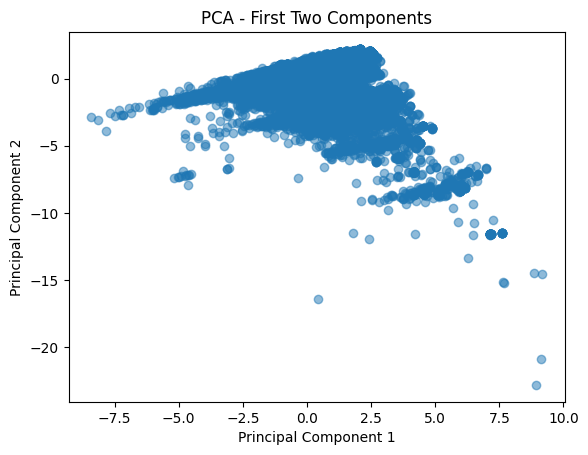

In [47]:
plt.scatter(combined_cities_after_pca[:, 0], combined_cities_after_pca[:, 1], alpha=0.5)
plt.title("PCA - First Two Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

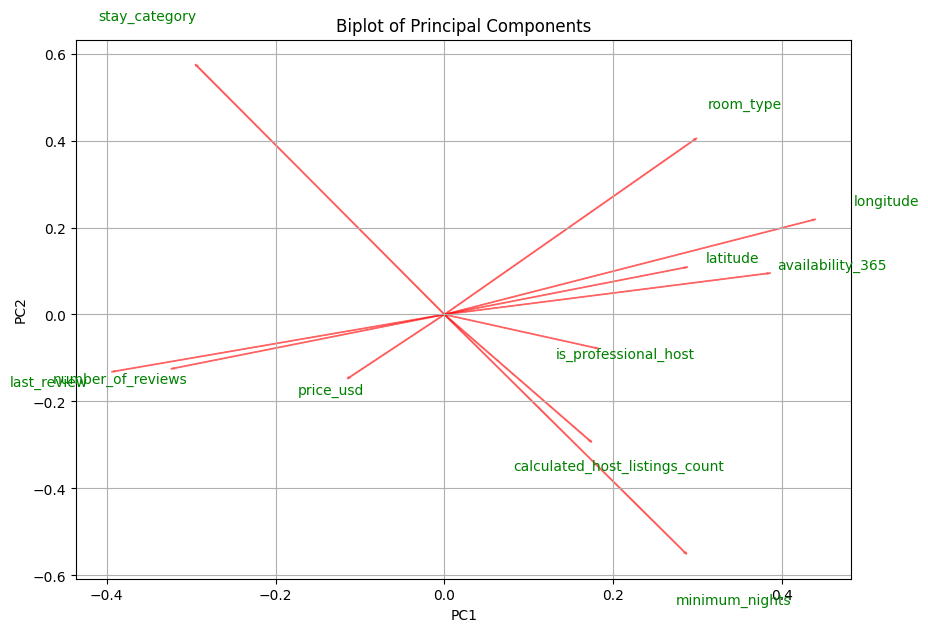

In [48]:
plt.figure(figsize=(10, 7))
for i, feature in enumerate(combined_cities[numerical_features].columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='r', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2,
             feature, color='g', ha='center', va='center')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot of Principal Components")
plt.grid()
plt.show()


# Clustering


I want applying clustering algorithms to PCA-reduced data to group listings based on similarities in the principal components. 

In [49]:
from sklearn.cluster import DBSCAN , HDBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


**1.  KMeans**

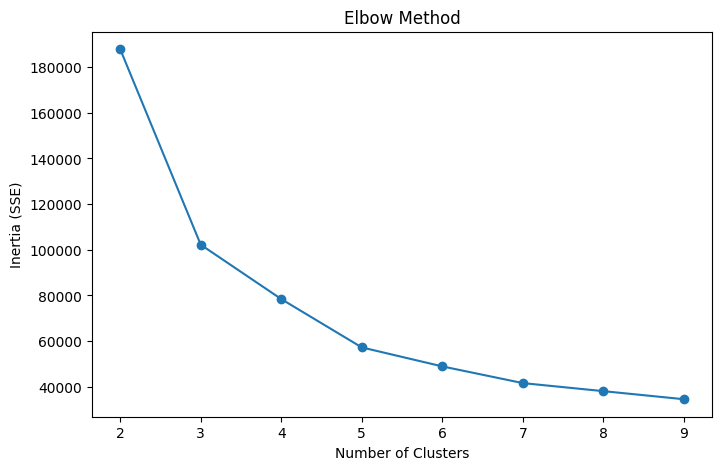

In [50]:

pca_data = combined_cities_after_pca  

# Elbow Method to find the optimal number of clusters
inertia = []
cluster_range = range(2, 10)  # Testing 2 to 9 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (SSE)")
plt.show()


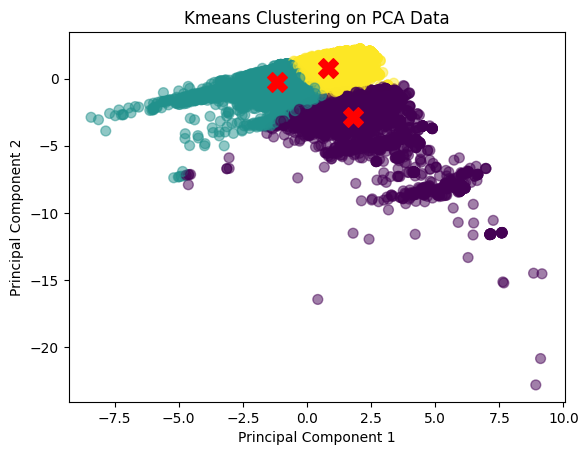

In [51]:
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(combined_cities_after_pca)
kmeans_labels = kmeans.predict(combined_cities_after_pca)
kmeans_score = silhouette_score(combined_cities_after_pca, kmeans_labels)

plt.scatter(combined_cities_after_pca[:, 0], combined_cities_after_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5, s= 50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c ="red", marker="X", s=200)
plt.title("Kmeans Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [52]:
kmeans_score # the data point is near a boundary or on a boundary between clusters

np.float64(0.49575731866776185)

<function matplotlib.pyplot.show(close=None, block=None)>

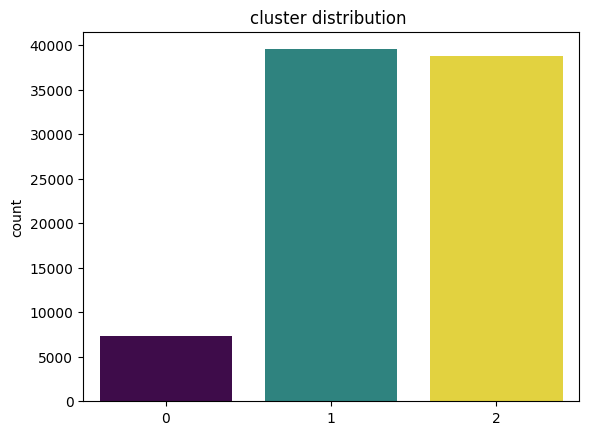

In [53]:
plot =sns.countplot(x = kmeans_labels, hue = kmeans_labels, palette="viridis", legend=False)
plot.set_title("cluster distribution ")
plt.show

In [55]:
combined_cities["cluster"]= kmeans_labels

In [56]:
combined_cities.head()

,name,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,city,price_usd,is_professional_host,stay_category,cluster
id,,,,,,,,,,,,,,,,
2265,Zen-East in the Heart of Austin (monthly rental),Paddy,78702,30.27752,-97.71377,0,7,26,2021,3,35,Austin,179.0,1,2,1
5245,"Eco friendly, Colorful, Clean, Cozy monthly share",Paddy,78702,30.27614,-97.71320,2,30,9,2017,3,0,Austin,114.0,1,0,0
5456,"Walk to 6th, Rainey St and Convention Ctr",Sylvia,78702,30.26057,-97.73441,0,2,575,2021,1,324,Austin,108.0,0,2,1
5769,NW Austin Room,Elizabeth,78729,30.45697,-97.78422,2,1,264,2021,1,0,Austin,39.0,0,2,1
6413,Gem of a Studio near Downtown,Todd,78704,30.24885,-97.73587,0,3,117,2021,1,0,Austin,109.0,0,2,1


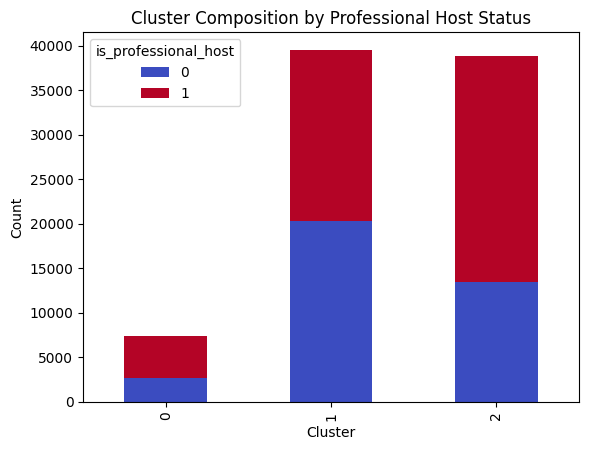

In [57]:
cluster_distribution = pd.crosstab(combined_cities['cluster'], combined_cities['is_professional_host'])
cluster_distribution.plot(kind='bar', stacked=True, cmap='coolwarm')
plt.title('Cluster Composition by Professional Host Status')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

This plot indicates clustering is not effectively separating professional and non-professional hosts. I guess, the clustering is likely influenced by other dimensions (e.g., price, room type, or geography). We'll see how the other methods cluster. 

**2. DBSCAN**

In [58]:
# standart parametrs 
dbs = DBSCAN(eps=0.3, min_samples=100)
y_pred = dbs.fit_predict(combined_cities_after_pca)

In [59]:
clusters = len(np.unique(y_pred))
score=silhouette_score(combined_cities_after_pca, y_pred)
noise_ratio = sum(y_pred == -1)/len(y_pred)
print (f'DBSCAN,silhouette_score: {score}' )
print(f' Noise ratio: {noise_ratio}')

DBSCAN,silhouette_score: 0.5671231372478138
 Noise ratio: 0.019304118600772163


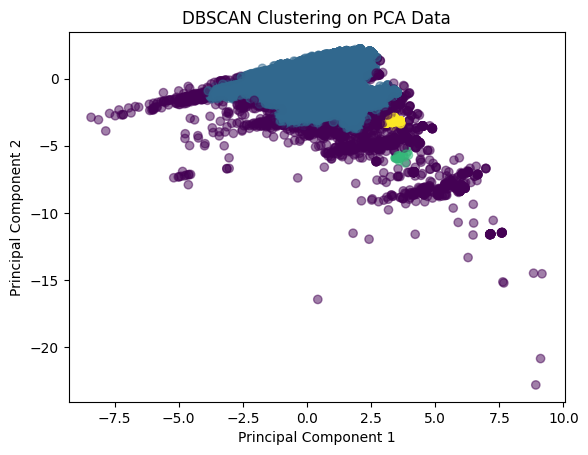

In [60]:
plt.scatter(combined_cities_after_pca[:, 0], combined_cities_after_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.5)
plt.title("DBSCAN Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
combined_cities['cluster'] = y_pred
cluster_summary = combined_cities.groupby('cluster')[numerical_features].mean()
print(cluster_summary.T.head(12))

In [ ]:
from tqdm import tqdm  

eps_range = np.arange(0.1, 2, 0.1)  
min_samples_range = range(50, 200 ,50)  

best_score = -1
best_params = None
result=[]
# Grid search for best parameters
for eps in tqdm(eps_range):
    for min_samples in min_samples_range:
        clust = DBSCAN(eps=eps, min_samples=min_samples)
        labels_dbs = clust.fit_predict(combined_cities_after_pca) 
        n_clusters=len(set(labels))-(1 if -1 in labels else 0)

        # Avoid cases where all points are assigned to one cluster (noise)
        if 1 < n_clusters < len(combined_cities_after_pca)-1 :  
            score = silhouette_score(combined_cities_after_pca, labels_dbs)
            result.append((eps, min_samples, n_clusters, score))
        else:
            score = best_score
            result.append((eps, min_samples, n_clusters, score))
            
result_sorted = sorted(result, key = lambda x: x[3], reverse=True)

for i in result_sorted:
    print(f"eps: {i[0]}, min_samples: {i[1]}, n_clusters: {i[2]}, score: {i[3]}")

  5%|█████████▉                                                                                                                                                                                  | 1/19 [04:40<1:24:01, 280.08s/it]

In [70]:
# after selecting hyperparameters
dbs = DBSCAN(eps=0.4, min_samples=100)
y_pred = dbs.fit_predict(combined_cities_after_pca)

In [71]:
clusters = len(np.unique(y_pred))
score=silhouette_score(combined_cities_after_pca, y_pred)
noise_ratio = sum(y_pred == -1)/len(y_pred)
print (f'DBSCAN,silhouette_score: {score}' )
print(f' Noise ratio: {noise_ratio}')

DBSCAN,silhouette_score: 0.6923382057684594
 Noise ratio: 0.013017157920520687


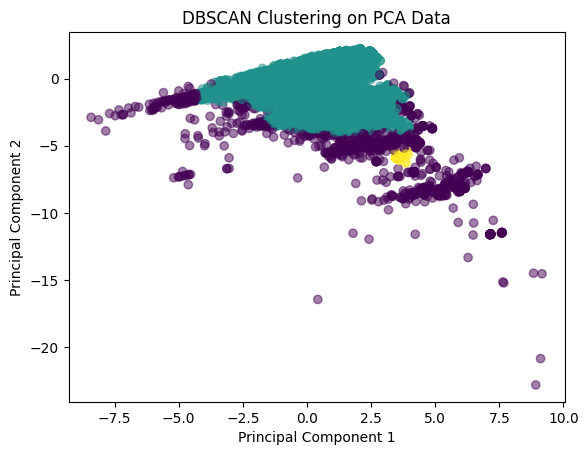

In [72]:
plt.scatter(combined_cities_after_pca[:, 0], combined_cities_after_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.5)
plt.title("DBSCAN Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [73]:
combined_cities['cluster'] = y_pred
cluster_summary = combined_cities.groupby('cluster')[numerical_features].mean()
print(cluster_summary.T.head(12))

cluster                                 -1            0           1
latitude                         13.591610     3.522414   30.616226
longitude                        -0.615360     7.216134  -83.322051
room_type                         0.326165     0.651605    0.000000
minimum_nights                  193.578853     5.121109   47.434783
number_of_reviews                62.289427    16.193750    0.486957
last_review                     964.473118  1306.612535   78.973913
calculated_host_listings_count   34.865591     8.191167  267.900000
availability_365                268.609319   232.614111  344.952174
price_usd                       495.323407    77.068765  170.826617
is_professional_host              0.574373     0.572813    0.991304
stay_category                     0.310932     1.823480    0.000000


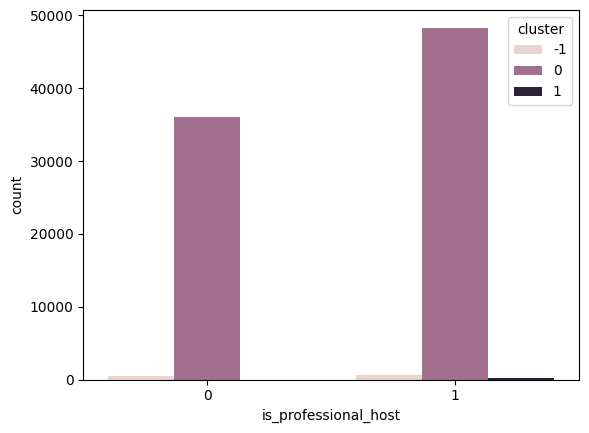

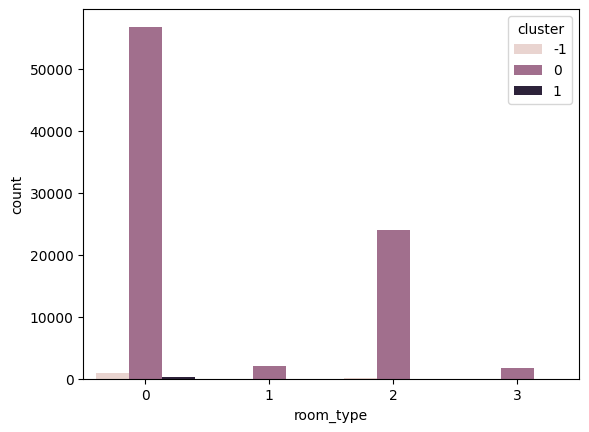

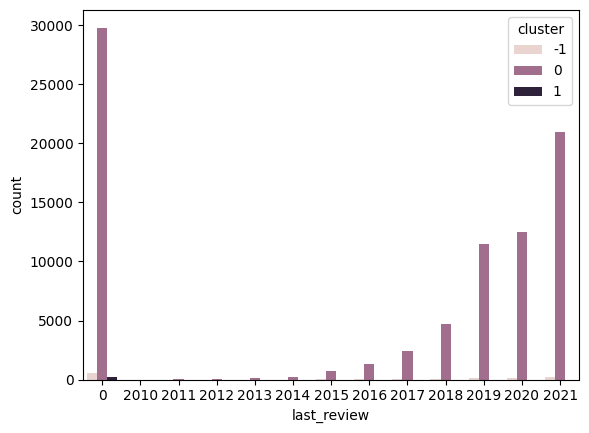

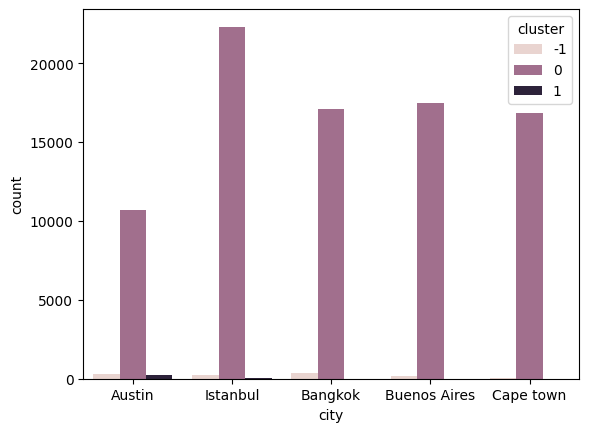

In [74]:
host = ["is_professional_host", "room_type", "last_review", "city"]
for i in host:
    plt.figure()
    sns.countplot(data=combined_cities, x=combined_cities[i], hue="cluster")
    plt.show()
    

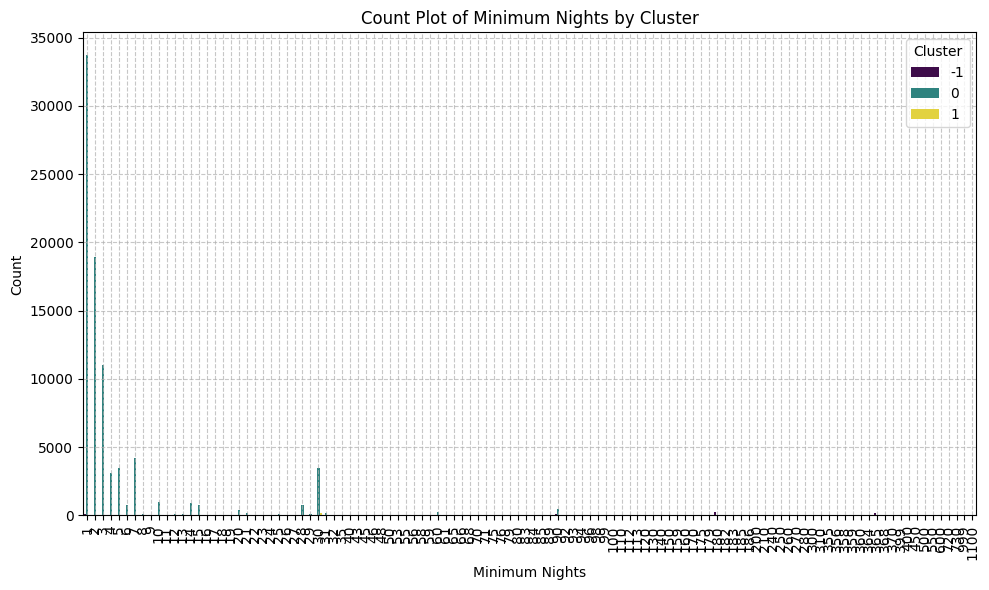

In [75]:
# Plot for "minimum_nights" by cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_cities, x="minimum_nights", hue="cluster", palette="viridis")
plt.title('Count Plot of Minimum Nights by Cluster')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


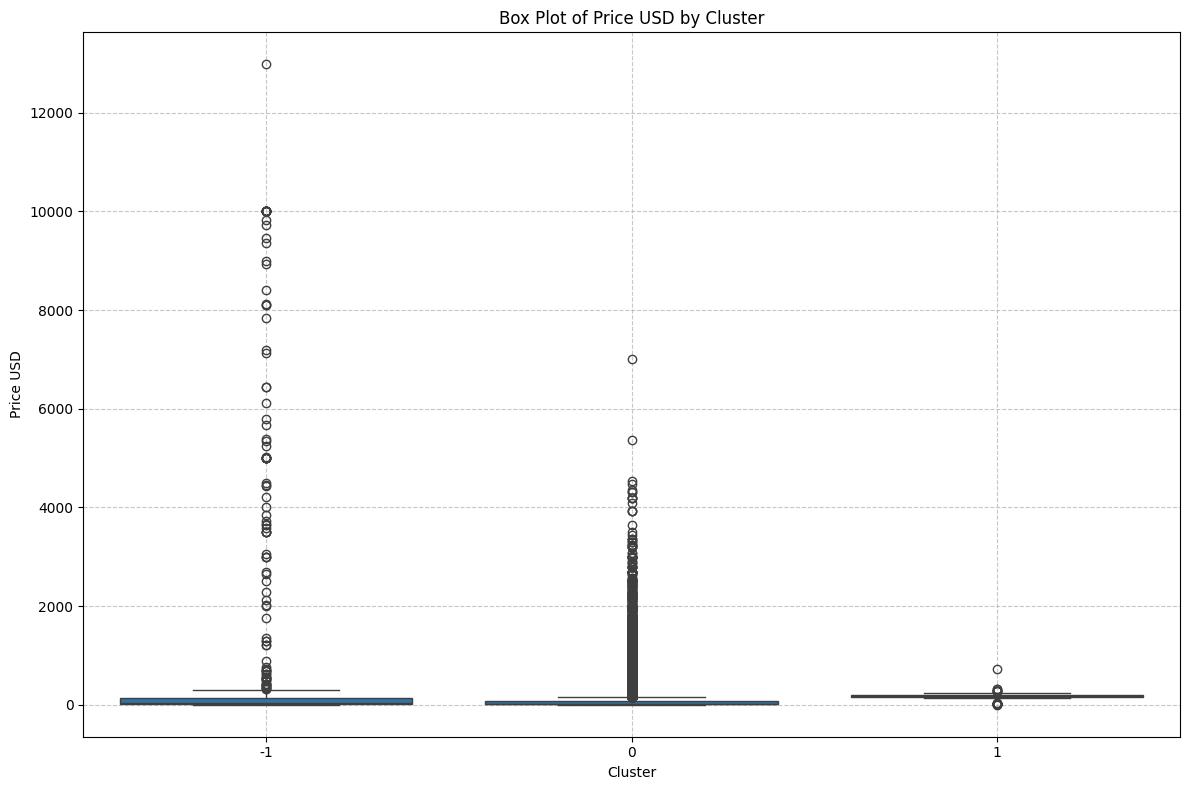

In [76]:
# Plot for "price_usd" by cluster 
plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_cities, x="cluster", y="price_usd")
plt.title('Box Plot of Price USD by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Price USD')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Using DBSCAN clustering and PCA-redundant data:

Cluster -1 (noise):
Represents luxury or niche long-term lodging.
Listings are characterized by high prices ($495+), high number of minimum nights.

Cluster 0 (Mainstream Listings):
Dominates the dataset with budget short-term rental options.
Listings have affordable prices (~$77), short minimum nights (-5), and moderate reviews.
Professional hosts predominate here.

Cluster 1 (professional hosts with a large number of listings):
Characterized by mid-range prices (-$170) and longer stays (47 nights).
99% of professional hosts manage a significant number of listings (~267 per host).
The low number of reviews suggests that the properties are new or underutilized.

Trends:
Clusters confirm market segmentation:
Luxury lodging facilities (cluster -1).
Budget basic listings (cluster 0).
Professional mid-term rentals (cluster 1).



Summary: 
Several tactics can be considered to increase the attractiveness of hosts:
Use promo codes or bonuses for guests who leave reviews. This increases the appeal of the listing and boosts profits. 
Over 12% (on average) of hosts leave no reviews. 
For Austin:
Aim to partner with non-professional hosts, as they dominate the market and offer more flexibility.
Highlight upscale accommodations for business and leisure travelers.
 For Bangkok and Istanbul:
Focus on professional hosts for both short-term and long-term stays.
 For Cape Town:
Explore why professional hosts avoid long-term rentals and consider incentives to increase engagement.

Use a cluster data to identify gaps in the market:
Cluster -1: Promote luxury real estate.
Cluster 0: Maintain budget offerings.
Cluster 1: Improve visibility and occupancy for professional landlords with more listings.

The findings  support Airbnb’s ventures into real estate programs (Airbnb-Friendly Apartments/Condos) and new verticals like Experiences.
[Source](https://news.airbnb.com/expanding-airbnb-friendly-new-opportunities-for-renters-and-homeowners/)

Airbnb-Friendly Apartments:
Cities like Buenos Aires and Istanbul show lower average and maximum prices, making them ideal markets for affordable rental programs.
Recommendation: Introduce Airbnb-Friendly Apartments and Condos in these cities to offer affordable options for both long-term and short-term guests.
New Verticals – Experiences 2.0:
Cities like Bangkok and Cape Town have high professional host activity, suggesting opportunities to promote local experiences curated by hosts.
Recommendation: Encourage professional hosts to integrate unique local experiences into their listings, making Airbnb a daily companion for travelers.
